In [1]:
import pandas as pd

学习目标
- 熟练掌握Pandas数据可视化常用功能

# pandas 数据可视化简介

pandas库是Python数据分析的核心库

- 1）它不仅可以加载和转换数据，还可以做更多的事情：它还可以可视化

- 2）pandas 绘图 API 简单易用，是 pandas 流行的重要原因之一

# pandas 单变量可视化

- 单变量可视化： 包括条形图、折线图、直方图、饼图等

## 数据集简介

数据使用葡萄酒评论数据集, 来自葡萄酒爱好者杂志(wineEnthusiast)：包含10个字段、150929行、每一行代表一款葡萄酒

- 字段名  字段描述
- country  葡萄酒产地(国家)
- description  对酒的评语(气味\味道\外观\感觉等)
- designation  用于酿酒的葡萄产自哪个葡萄园
- points  WineEnthusiast(葡萄酒爱好者杂志)对葡萄酒的评分(1~100)
- price  价格
- province  葡萄酒产地(省/州)
- region_1  葡萄种植区_1
- region_2  葡萄种植区_2(有可能为空)
- variety  用于酿酒的葡萄种类
- winery  酿酒厂名

In [2]:
# 加载数据
reviews = pd.read_csv('./data/winemag-data_first150k.csv',index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## 柱状图和分类数据

- 柱状图是最简单最常用的可视化图表
- 条形图(柱状图)非常灵活：
- 高度可以代表任何东西，只要它是数字即可
- 每个条形可以代表任何东西，只要它是一个类别即可

- 在下面的案例中，将所有的葡萄酒品牌按照产区分类，看看哪个产区的葡萄酒品最多

### 示例：统计生产葡萄酒最多的 10 个产区

<AxesSubplot: >

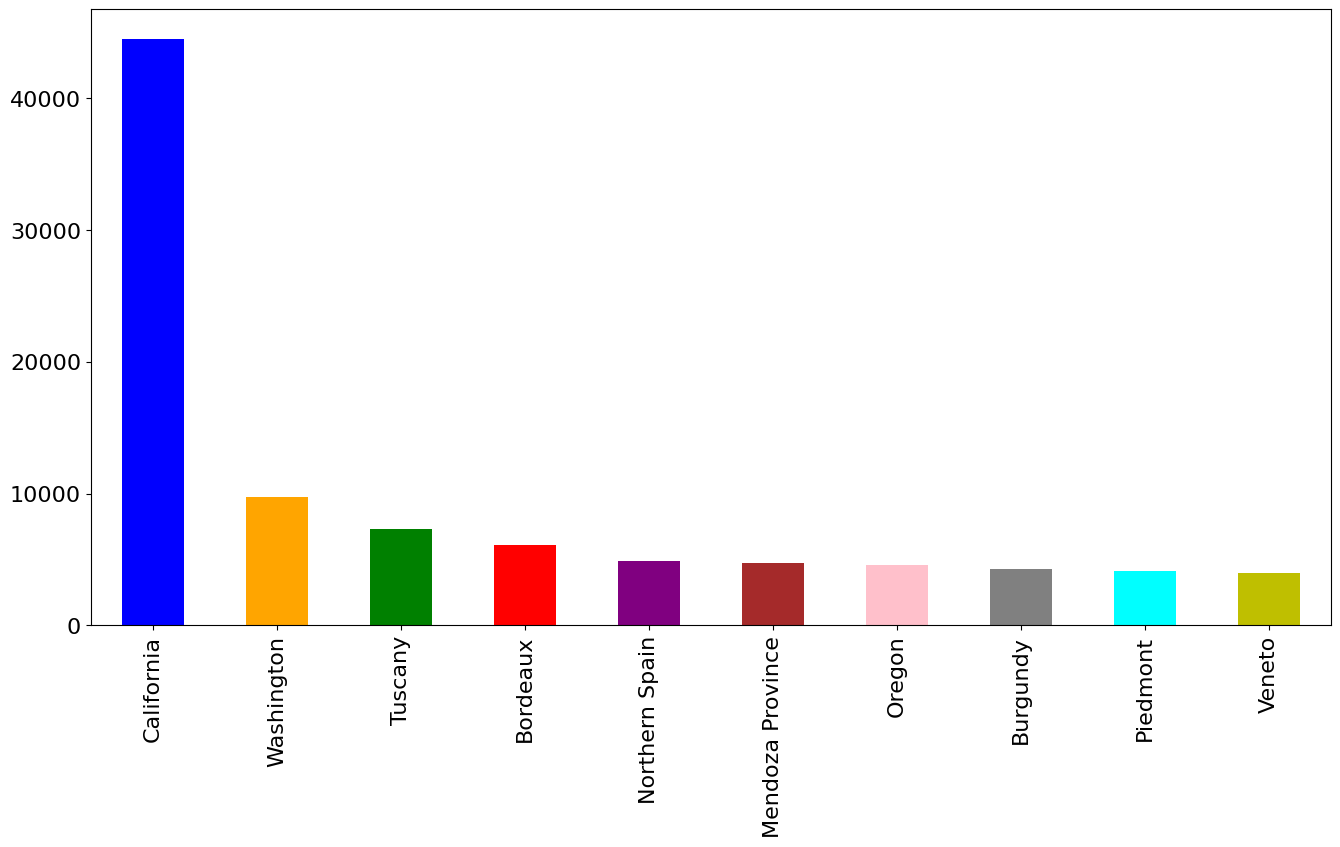

In [3]:
# 准备绘图参数
text_kwargs = dict(figsize=(16,8),
                  fontsize=16,
                  color =['b','orange','g','r','purple','brown','pink','gray','cyan','y'])
# 获取葡萄酒产量最多的10个产区，并绘制柱状图
reviews['province'].value_counts().head(10).plot.bar(**text_kwargs)

- 上面的图表说明加利福尼亚生产的葡萄酒比其他省都多

- 也可以折算成比例, 计算加利福尼亚葡萄酒占总数的百分比：

<AxesSubplot: >

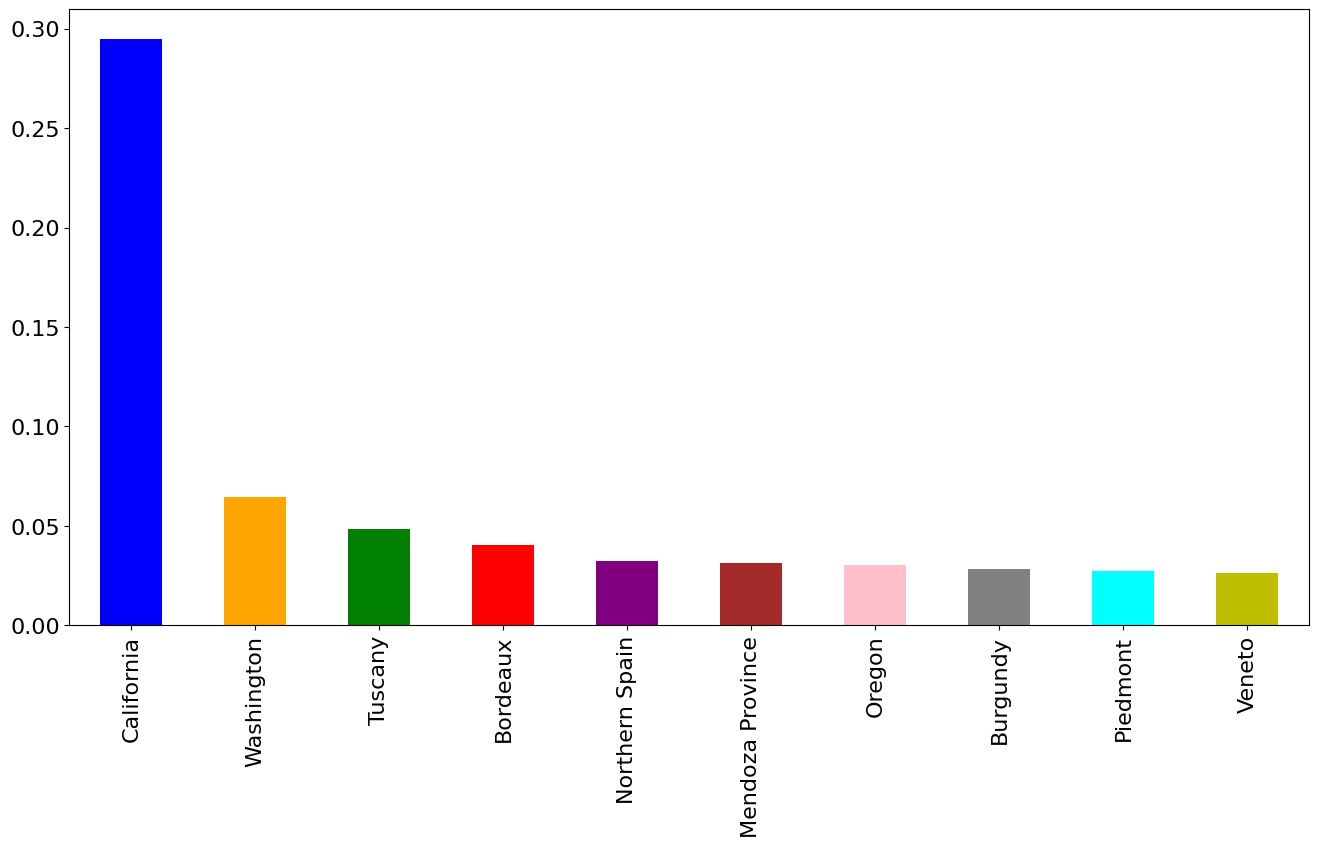

In [4]:
(reviews['province'].value_counts().head(10)/len(reviews)).plot.bar(**text_kwargs)

- 在《葡萄酒杂志》（Wine Magazine）评述的葡萄酒中，加利福尼亚生产了近三分之一！
- 也可以用来展示《葡萄酒杂志》（Wine Magazine）给出的评分数量的分布情况：

<AxesSubplot: >

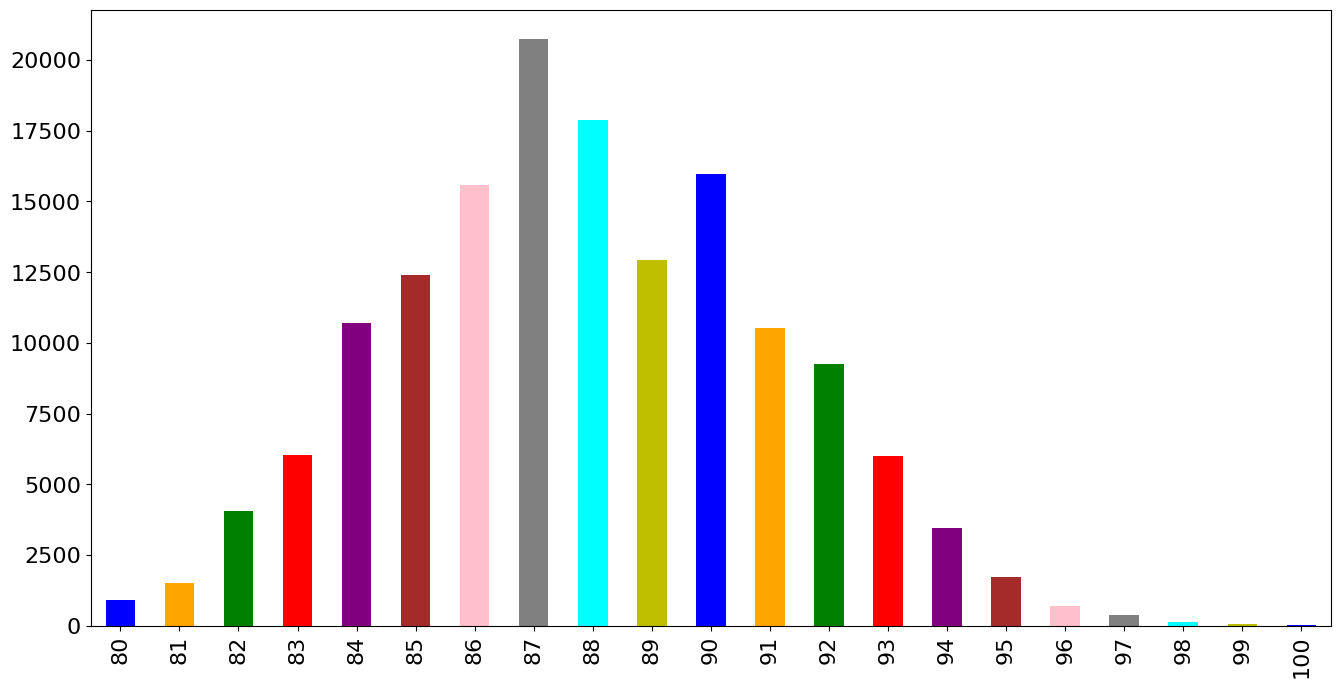

In [5]:
reviews['points'].value_counts().sort_index().plot.bar(**text_kwargs)

## 折线图

- 如果要绘制的数据不是类别值，而是连续值比较适合使用折线图

<AxesSubplot: >

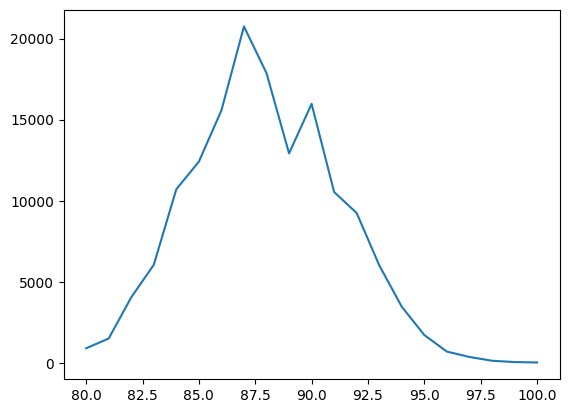

In [6]:
reviews['points'].value_counts().sort_index().plot()

<AxesSubplot: >

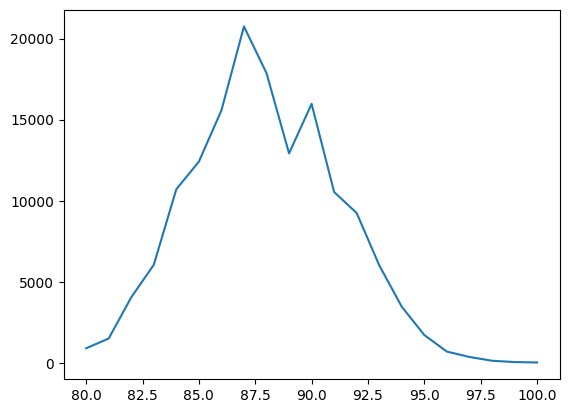

In [7]:
reviews['points'].value_counts().sort_index().plot.line()

柱状图和折线图区别：

- 1）柱状图：简单直观，很容易根据柱子的长短看出值的大小，易于比较各组数据之间的差别

- 2）折线图：

易于比较各组数据之间的差别
能比较多组数据在同一个维度上的趋势
每张图上不适合展示太多折线

In [8]:
# 小练习：柱状图或折线图

# 5种不同口味冰激凌，不同口味冰激凌的销售数量。
# 国产轿车不同品牌的月销售数量。
# 学生的考试分数：范围为0-100

## 面积图

- 面积图就是在折线图的基础上，把折线下面的面积填充颜色

<AxesSubplot: >

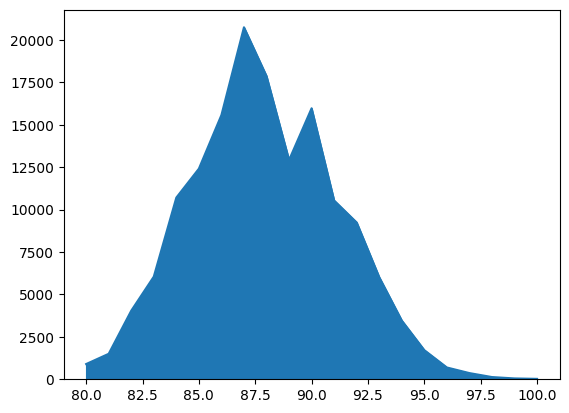

In [9]:
reviews['points'].value_counts().sort_index().plot.area()

## 直方图

- 直方图看起来很像条形图。 直方图是一种特殊的条形图，它可以将数据分成均匀的间隔，并用条形图显示每个间隔中有多少行。

- 直方图柱子的宽度代表了分组的间距，柱状图柱子宽度没有意义

- 直方图缺点：将数据分成均匀的间隔区间，所以它们对歪斜的数据的处理不是很好

<AxesSubplot: ylabel='Frequency'>

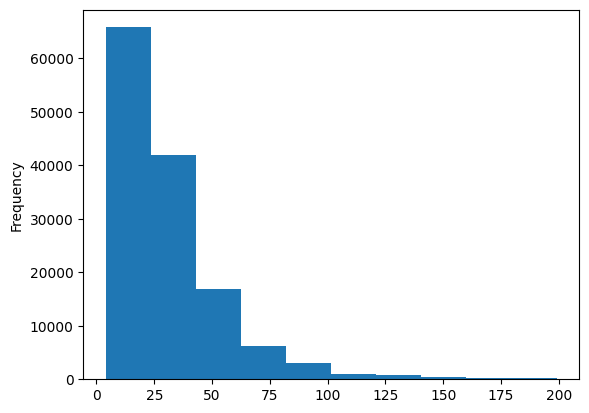

In [10]:
reviews[reviews['price']<200]['price'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

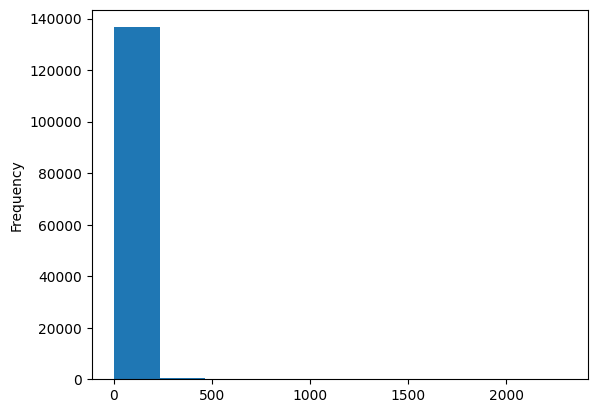

In [11]:
reviews['price'].plot.hist()

- 结果说明：

- 在第一个直方图中，将价格>200的葡萄酒排除了
- 在第二个直方图中，没有对价格做任何处理，由于有个别品种的酒价格极高，导致直方图的价格分布发生变化

In [12]:
# 查看葡萄酒价格高于1500情况
reviews[reviews['price'] > 1500]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


In [13]:
reviews[reviews['price'] > 500].shape

(73, 10)

- 数据倾斜：

- 当数据在某个维度上分布不均匀，称为数据倾斜
- 一共15万条数据，价格高于1500的只有三条
- 价格高于500的只有73条数据，说明在价格这个维度上，数据的分布是不均匀的
- 直方图适合用来展示没有数据倾斜的数据分布情况，不适合展示数据倾斜的数据俊辉- 

- 对葡萄就的评分不存在数据倾斜的情况，评分数据的分布情况比较适合用直方图展示：

<AxesSubplot: ylabel='Frequency'>

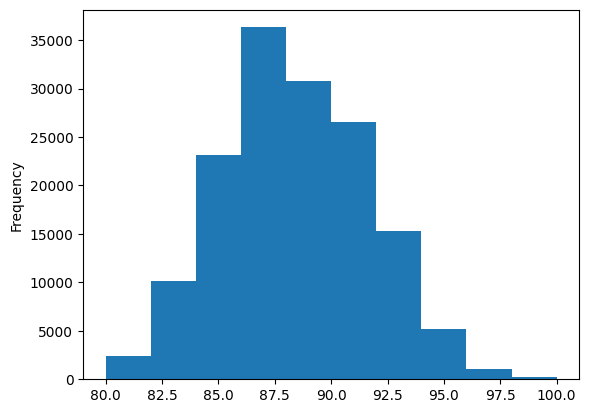

In [14]:
reviews['points'].plot.hist()

In [15]:
# 小练习：柱状图，折线图/面积图 还是直方图

# 不同苹果种类（花牛，富士，国光等）在果园采摘的苹果量。
# 一个赛季在所有篮球比赛中的得分数

## 饼图

<AxesSubplot: ylabel='province'>

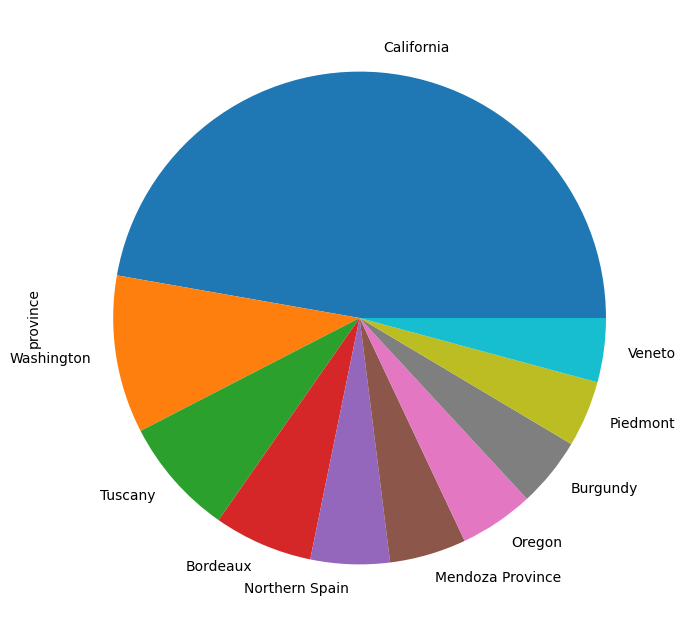

In [16]:
# 饼图也是一种常见的可视化形式
reviews['province'].value_counts().head(10).plot.pie(figsize=(20,8))

- 饼图的缺陷：饼图只适合展示少量分类在整体的占比

- 如果分类比较多，必然每个分类的面积会比较小，这个时候很难比较两个类别
- 如果两个类别在饼图中彼此不相邻，很难进行比较
- 可以使用柱状图图来替换饼图- 

# pandas 双变量可视化

- 在上一小结中，介绍了使用Pandas绘图，理解单个变量在数据中的互相关系，本小节会考察两个变量如何进行可视化

- 数据分析时，我们需要找到变量之间的相互关系，比如一个变量的增加是否与另一个变量有关，数据可视化是找到两个变量的关系的最佳方法- 

## 散点图

<AxesSubplot: xlabel='price', ylabel='points'>

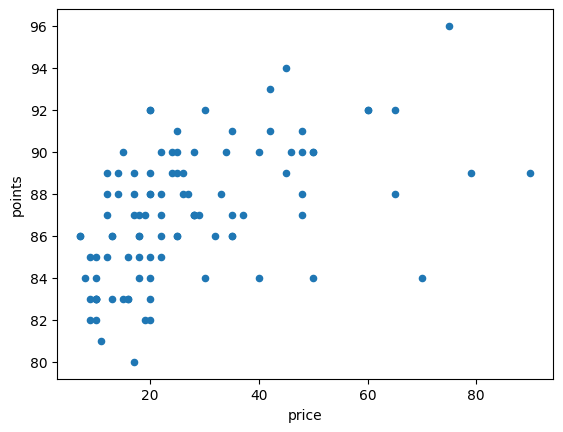

In [17]:
# 简单的两个变量可视化图形是散点图，散点图中的一个点，可以表示两个变量
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price',y='points')

- 调整图形大小，字体大小，由于pandas的绘图功能是对Matplotlib绘图功能的封装，所以很多参数pandas 和 matplotlib都一样：

<AxesSubplot: xlabel='price', ylabel='points'>

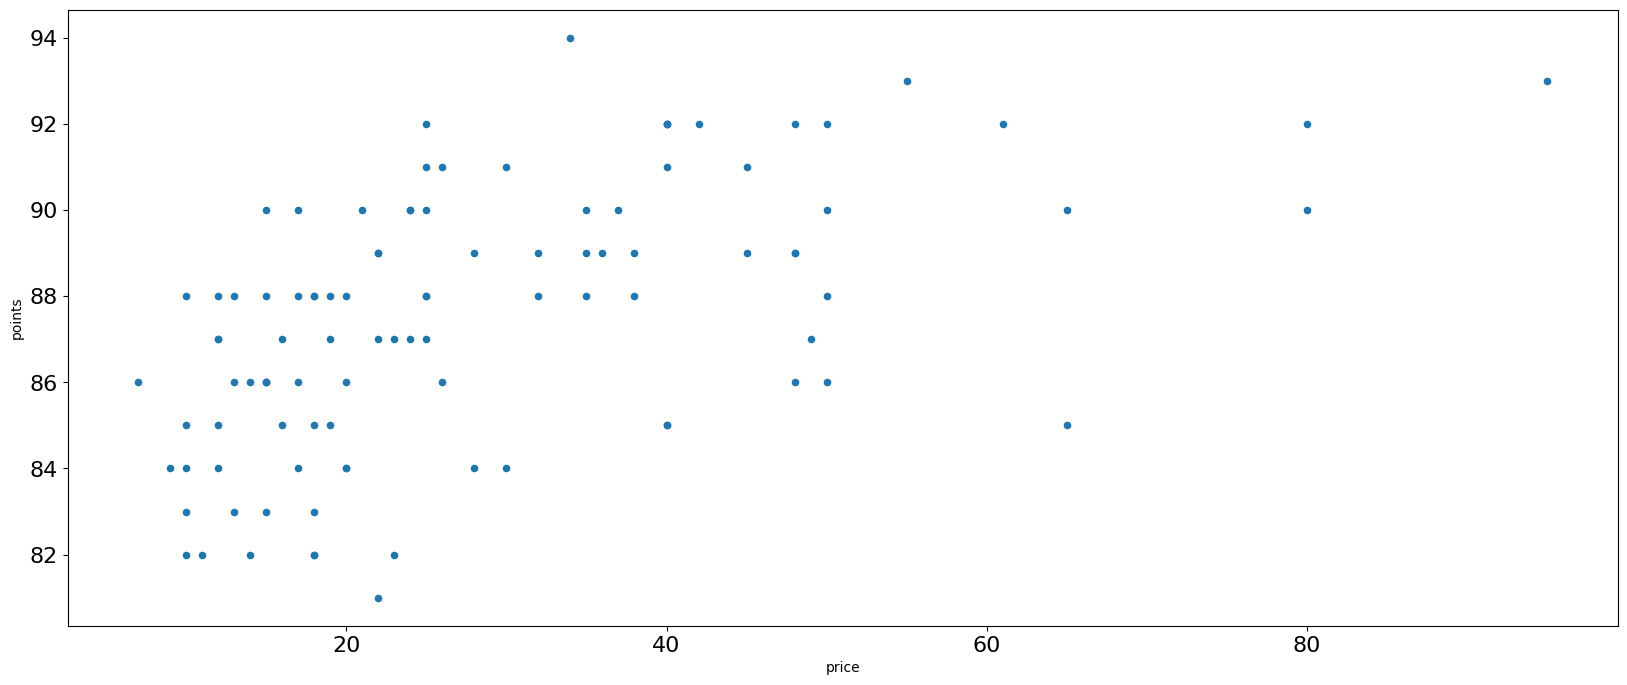

In [18]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price',
                                                         y='points',
                                                        figsize=(20,8),
                                                        fontsize=16)

Text(0, 0.5, 'points')

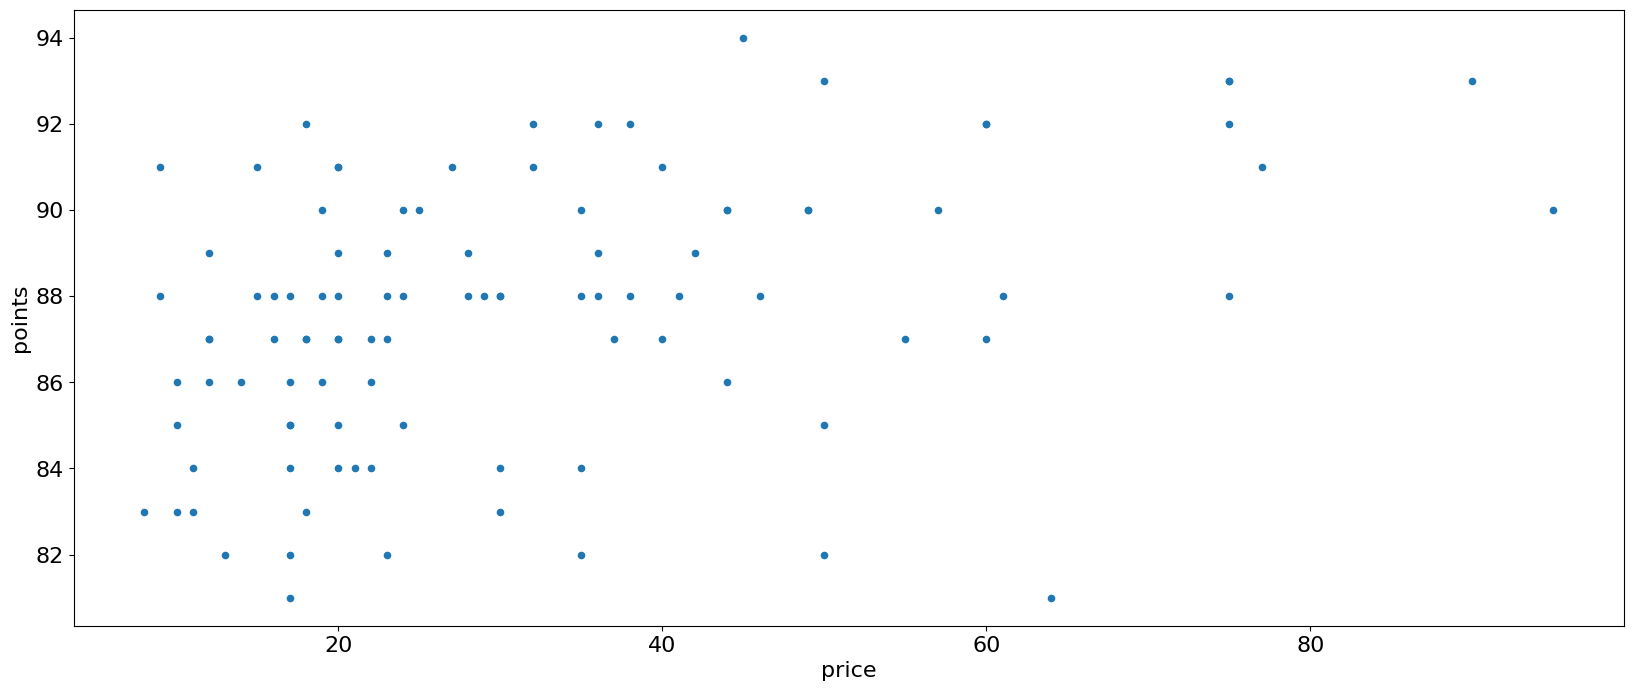

In [19]:
# 修改x轴、y轴标签字体：
import matplotlib.pyplot as plt
fig,axes = plt.subplots(ncols=1,figsize=(20,10))
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price',
                                                         y='points',
                                                        figsize=(20,8),
                                                        fontsize=16,
                                                        ax = axes)
axes.set_xlabel('price',fontdict={'fontsize':16})
axes.set_ylabel('points',fontdict={'fontsize':16})

- 结果说明：上图显示了价格和评分之间有一定的相关性：也就是说，价格较高的葡萄酒通常得分更高

- 请注意，我们必须对数据进行采样，从所有数据中抽取100条数据，如果将全部数据（15万条）都绘制到散点图上，会有很多点重叠在一起，不方便观察：

<AxesSubplot: xlabel='price', ylabel='points'>

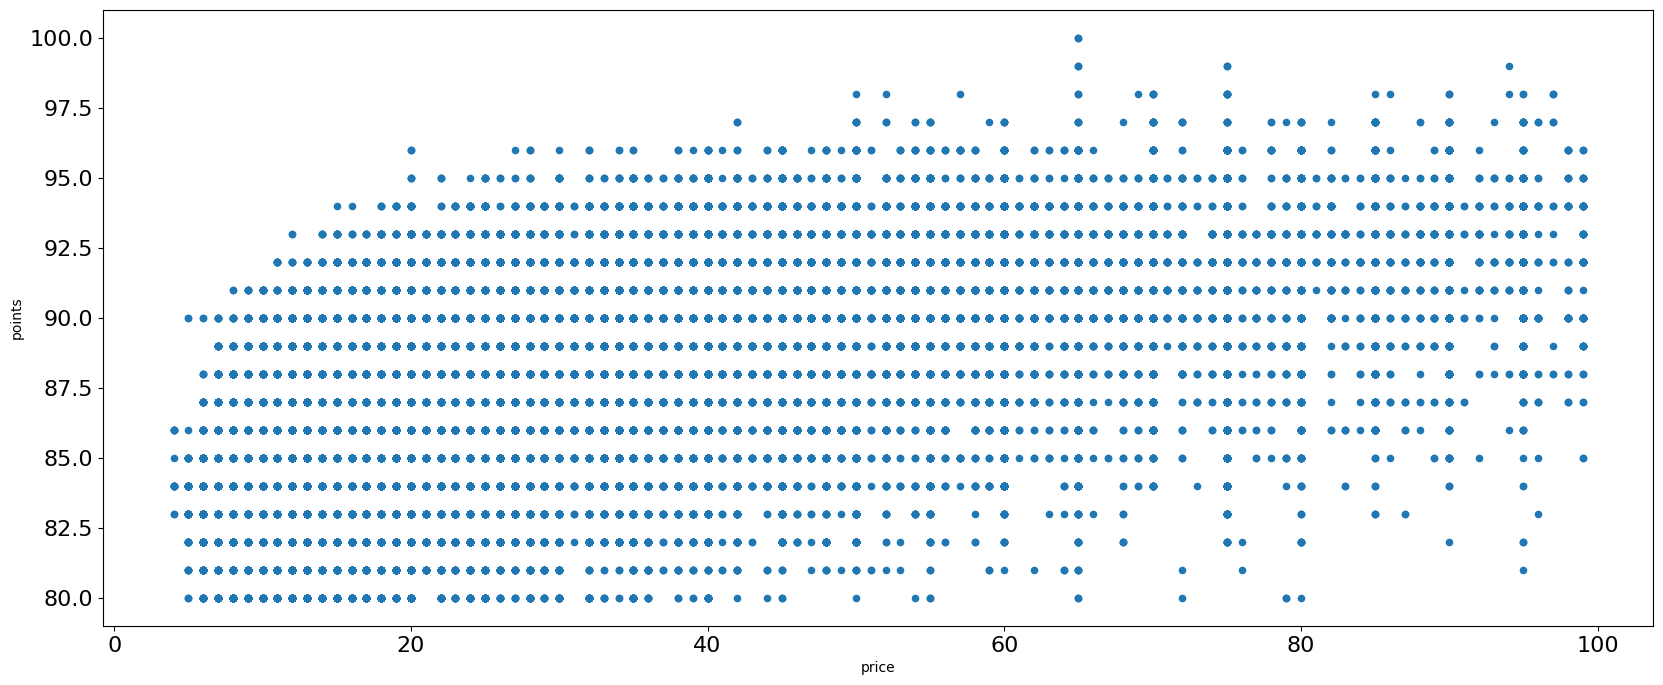

In [20]:
reviews[reviews['price'] < 100].plot.scatter(x='price',
                                             y='points',
                                             figsize=(20,8),
                                             fontsize=16)

由于散点图的缺点，因此散点图最适合使用相对较小的数据集以及具有大量唯一值的变量。

有几种方法可以处理过度绘图：

- 1）对数据进行采样

- 2）hexplot(蜂巢图)- 

## hexplot

- hexplot 将数据点聚合为六边形，然后根据其内的值为这些六边形上色

<AxesSubplot: xlabel='price', ylabel='points'>

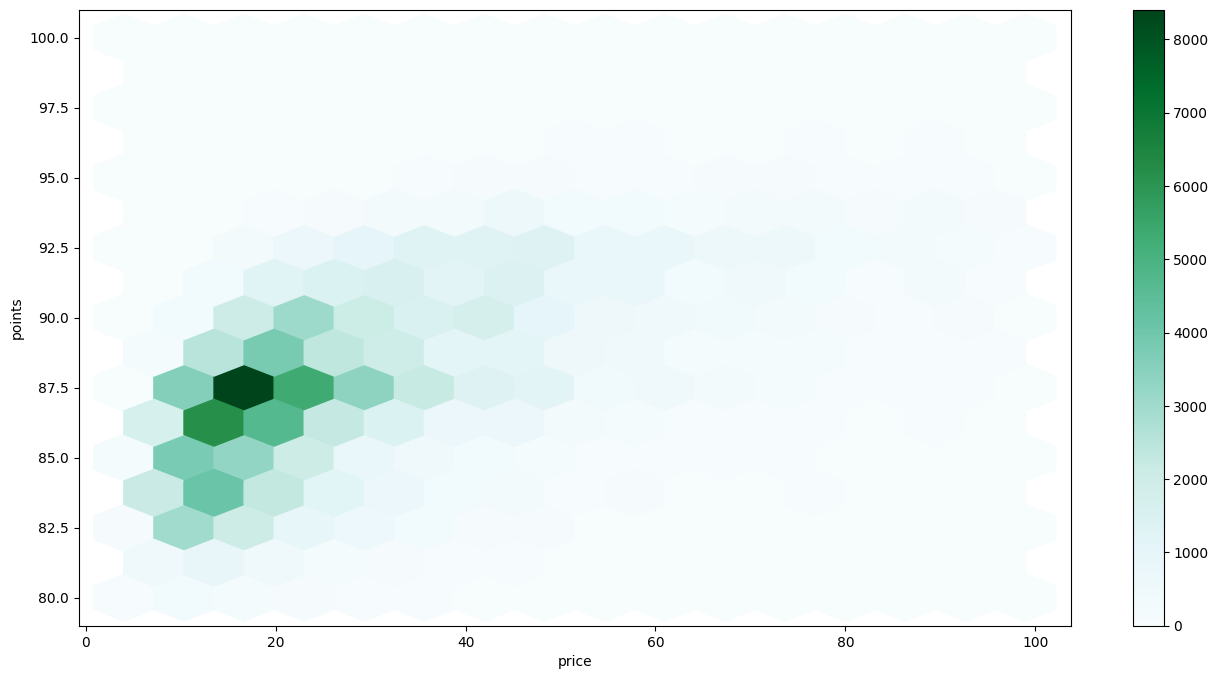

In [21]:
reviews[reviews['price'] < 100].plot.hexbin(x='price',y='points',figsize=(16,8),gridsize=15)

- 上图 x 轴坐标缺失，属于bug，可以通过调用 matplotlib 的 api 添加 x 坐标

<AxesSubplot: xlabel='price', ylabel='points'>

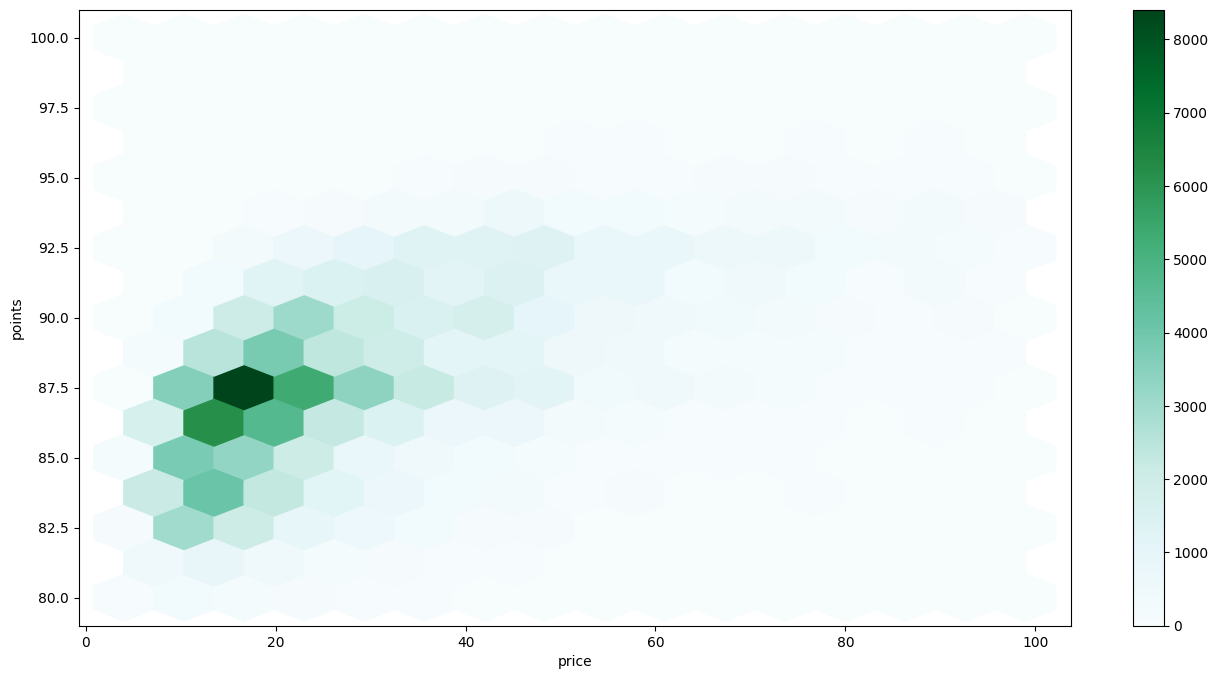

In [22]:
fig,axes = plt.subplots(ncols=1,figsize=(16,8))
reviews[reviews['price'] < 100].plot.hexbin(x='price',y='points',figsize=(16,8),gridsize=15,ax=axes)

- 结果说明：

- 该图中的数据可以和散点图中的数据进行比较，但是 hexplot 能展示的信息更多

- 从 hexplot 中，可以看到《葡萄酒杂志》（Wine Magazine）评论的葡萄酒瓶大多数是87.5分，价格20美元

- hexplot 和散点图可以应用于区间变量和/或有序分类变量的组合

## 堆叠图（Stacked plots）

- 展示两个变量，除了使用散点图，也可以使用堆叠图

- 堆叠图是将一个变量绘制在另一个变量顶部的图表

- 接下来通过堆叠图来展示最常见的五种葡萄酒：

### 查看数量最多的 5 种葡萄酒

In [23]:
reviews.groupby('variety')['country'].count().sort_values(ascending=False)

variety
Chardonnay                  14482
Pinot Noir                  14288
Cabernet Sauvignon          12800
Red Blend                   10061
Bordeaux-style Red Blend     7347
                            ...  
Terret Blanc                    1
Espadeiro                       1
Sangiovese Cabernet             1
Tempranillo-Malbec              1
Pinela                          1
Name: country, Length: 632, dtype: int64

- 结果说明：

- 从结果中看出，最受欢迎的葡萄酒是：Chardonnay（霞多丽白葡萄酒）、Pinot Noir（黑皮诺）、Cabernet Sauvignon（赤霞珠）、Red Blend（混酿红葡萄酒） 、Bordeaux-style Red Blend （波尔多风格混合红酒）- 

### 从数据中取出最常见的 5 种葡萄酒

In [24]:
# 取出最常见的5种酒
top_5_wine = reviews[reviews.variety.isin(['Chardonnay',
                                           'Pinot Noir',
                                           'Cabernet Sauvignon',
                                           'Red Blend',
                                           'Bordeaux-style Red Blend'])]
top_5_wine

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
...,...,...,...,...,...,...,...,...,...,...
150908,France,"Another premier cru from Michel Gros, this one...",Aux Brulees,90,65.0,Burgundy,Vosne-Romanée,NaN,Pinot Noir,Michel Gros
150909,France,"This is a lovely, fragrant Burgundy, with a sm...",Clos dea Argillieres,89,52.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Daniel Rion
150910,France,Scents of graham cracker and malted milk choco...,NaN,89,38.0,Burgundy,Chambolle-Musigny,NaN,Pinot Noir,Michel Gros
150911,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,NaN,Pinot Noir,Michel Gros


### 通过透视表找到每种葡萄酒中，不同评分的数量

In [25]:
wine_counts = top_5_wine.pivot_table(values='country',
                                    index='points',
                                    columns='variety',
                                    aggfunc='count')
wine_counts

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,89.0,70.0,36.0,75.0
81,23.0,160.0,154.0,83.0,108.0
82,83.0,436.0,523.0,296.0,233.0
83,122.0,571.0,686.0,350.0,366.0
84,334.0,925.0,1170.0,757.0,623.0
85,379.0,1058.0,1299.0,903.0,608.0
86,467.0,1205.0,1525.0,1260.0,919.0
87,679.0,1589.0,1887.0,1784.0,1375.0
88,741.0,1160.0,1513.0,1586.0,1366.0


- 结果说明：

- 从上面的数据中看出，行列分别表示一个类别变量（评分，葡萄酒类别），行列交叉点表示计数，这类数据很适合用堆叠图展示

### 利用上面的数据展示堆叠图

<AxesSubplot: xlabel='points'>

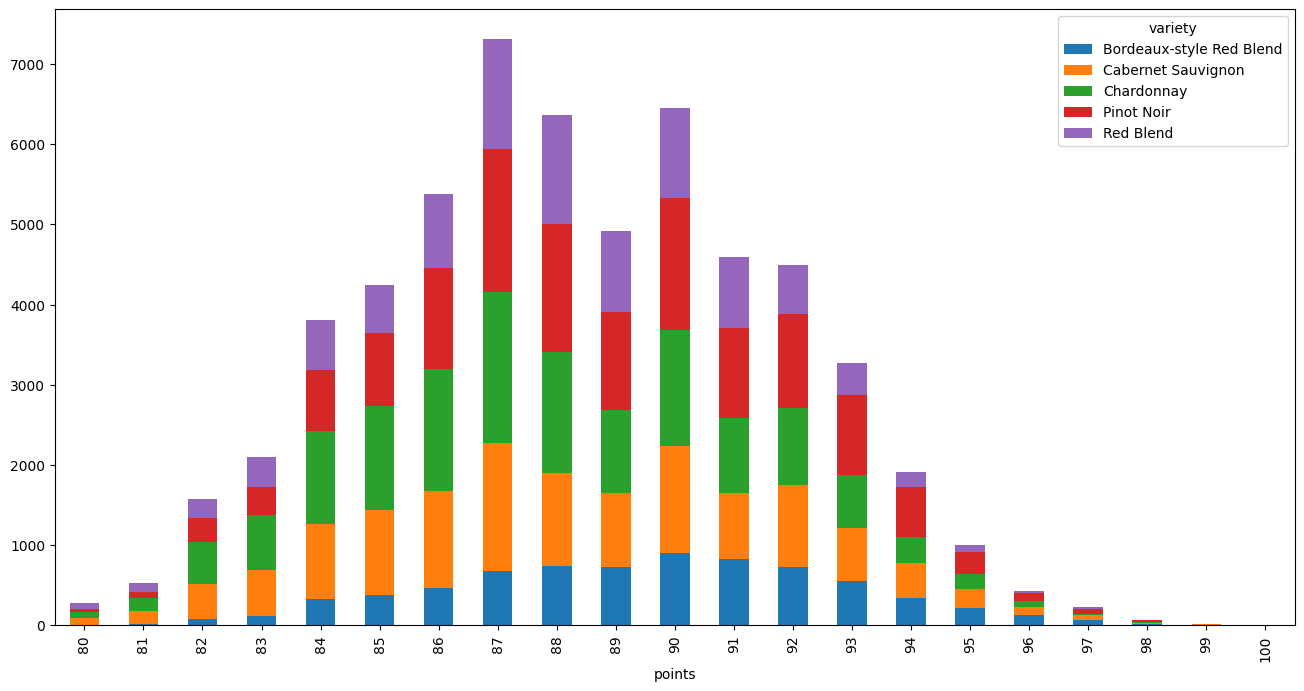

In [26]:
wine_counts.plot.bar(figsize=(16,8),stacked=True)

In [27]:
# 图为堆积柱状图，适合展示少量类别的分类数据

<AxesSubplot: xlabel='points'>

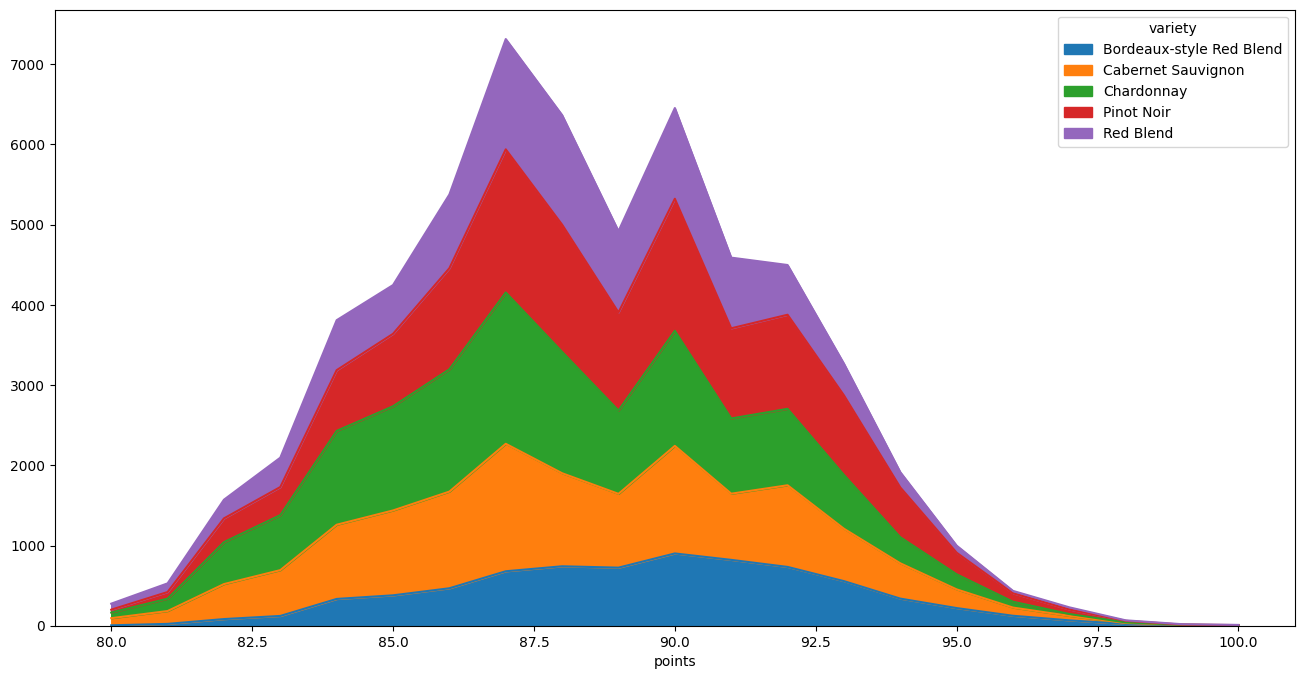

In [28]:
# 面积堆积图
wine_counts.plot.area(figsize=(16,8))

- 面积堆积图的使用限制：

- 种类较多的数据不适合用堆积图，图中显示的数据有五个种类，比较合适，一般不要超过8个种类
- 堆积图的可解释性（读图）较差

### 利用上面的数据展示折线图

<AxesSubplot: xlabel='points'>

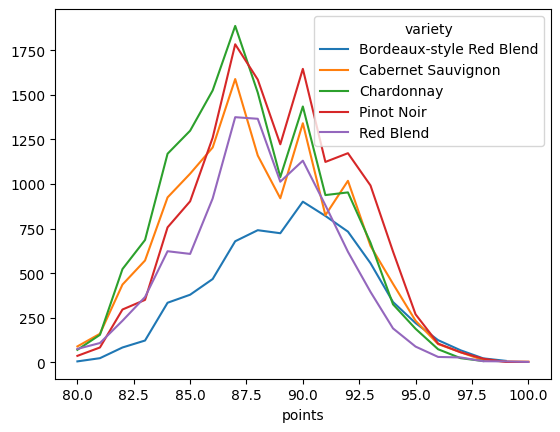

In [29]:
wine_counts.plot.line()

In [30]:
# 结果说明：
# 从上图看出，折线图的读图更容易，更容易对不同类别做对比
# 例如：在87分的酒中，哪个类别更多？从图中很容易看出，绿色的霞多丽比红色的黑比诺略多

# 总结
- pandas 绘图是对 Matplotlib 的封装
- Series 和 DataFrame 都有 plot 属性，根据不同的图形类型，调用对应的函数
- 可以通过 Matplotlib 控制图片的方法来控制 pandas 绘图的效果